                                         .-.-.  .-.-.  .-.-.  .-.-.  .-.-.  .-.-.  .-.-.  .-.-.  .-.-.  .-.-.  .-.-.  .-.-. 
                                        ( E .' ( n .' ( g .' ( a .' ( g .' ( e .' ( m .' ( e .' ( n .' ( t .' ( A .' ( I .'
                                         `.(    `.(    `.(    `.(    `.(    `.(    `.(    `.(    `.(    `.(    `.(    `.(

In [14]:
%reset -f

In [15]:
photo = r'..\db\input\images\frame33.jpg'
outputjson_emotion = r'..\out\frame33.json' # Output is retrived from Amazon Rekognition services

In [16]:
# Import dependencies
from PIL import Image
import pandas as pd
import numpy as np
import cv2
import json
import random
import matplotlib.pyplot as plt

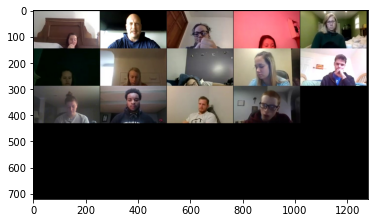

In [17]:
# Import sample images
img0=np.array(Image.open(photo))
plt.imshow(img0)
plt.show()

In [18]:
# Read output json
coordinates_emotions=json.load(open(outputjson_emotion,"r"))

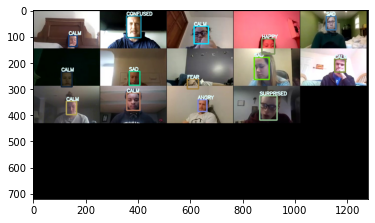

In [21]:
# Inferences
result = img0.copy()
for i,value in enumerate(coordinates_emotions["FaceDetails"]):
    BoundingBox = value["BoundingBox"]
    Emotions = value["Emotions"]
    df=pd.DataFrame(Emotions)
    label='%s' % (df["Type"].iloc[df['Confidence'].idxmax()])
    tl = round(0.002 * (img0.shape[0] + img0.shape[1]) / 2) + 1  # line/font thickness
    color = [random.randint(0, 255) for _ in range(3)]
    tf = max(tl - 1, 1)  # font thickness
    t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
    x1, y1, w_size, h_size= BoundingBox["Left"], BoundingBox["Top"], BoundingBox["Width"],BoundingBox["Height"]
    x_start = round(x1*img0.shape[1])
    y_start = round(y1*img0.shape[0])
    x_end = round(x_start + w_size*img0.shape[1])
    y_end = round(y_start + h_size*img0.shape[0])
    roi=img0.copy()
    roi = roi[y_start:y_end, x_start:x_end]
    cv2.imwrite(rf"..\db\artifact\Person_{str(i)}.jpg",cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    c1,c2=(x_start, y_start), (x_end, y_end)
    cv2.rectangle(result, c1,c2,color, thickness=tl, lineType=cv2.LINE_AA) 
    cv2.putText(result, label, (c1[0], c1[1] - 2), 0, tl / 5, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)
cv2.imwrite(r"..\out\result1.jpg",cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.imshow(result)
plt.show()

In [20]:
31*38

1178